In [ ]:
pip install sklearn matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install transformers

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")

Token indices sequence length is longer than the specified maximum sequence length for this model (19421 > 512). Running this sequence through the model will result in indexing errors


      manifesto_id  Token Length
2561  61320_196011         19421
2562  61620_196011         12983
2563  61320_196411          6334
2564  61620_196411         11106
2565  61320_196811         20131
2566  61620_196811         12365
2567  61320_197211         31238
2568  61620_197211         29575
2569  61320_197611         25462
2570  61620_197611         24271
2571  61320_198011         46021
2572  61620_198011         41919
2573  61320_198411         53056
2574  61620_198411         33999
2575  61320_198811          5919
2576  61620_198811         43892
2577  61320_199211         10534
2578  61620_199211         35185
2579  61320_199611         19496
2580  61620_199611         34473
2581  61320_200011         29162
2582  61620_200011         42764
2583  61320_200411         21481
2584  61620_200411         50637
2585  61320_200811         31642
2586  61620_200811         28520
2587  61320_201211         30241
2588  61620_201211         38275
2589  61320_201611         31952
2590  6162

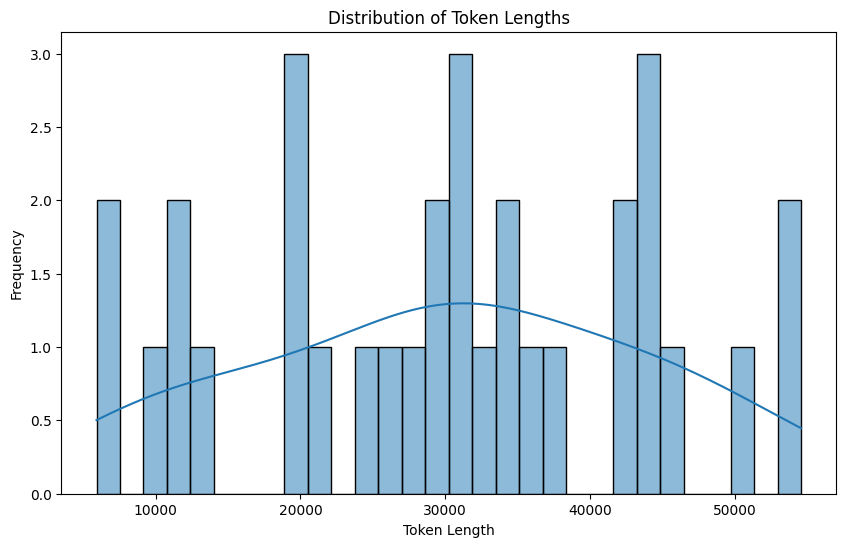

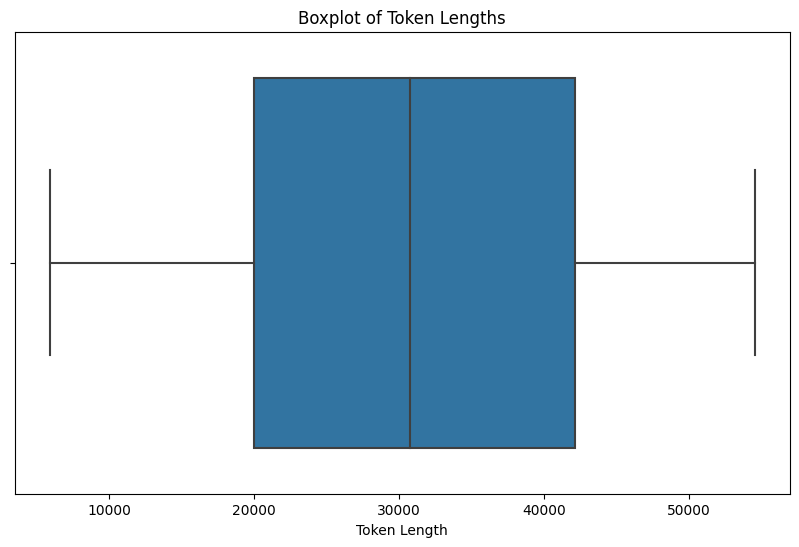

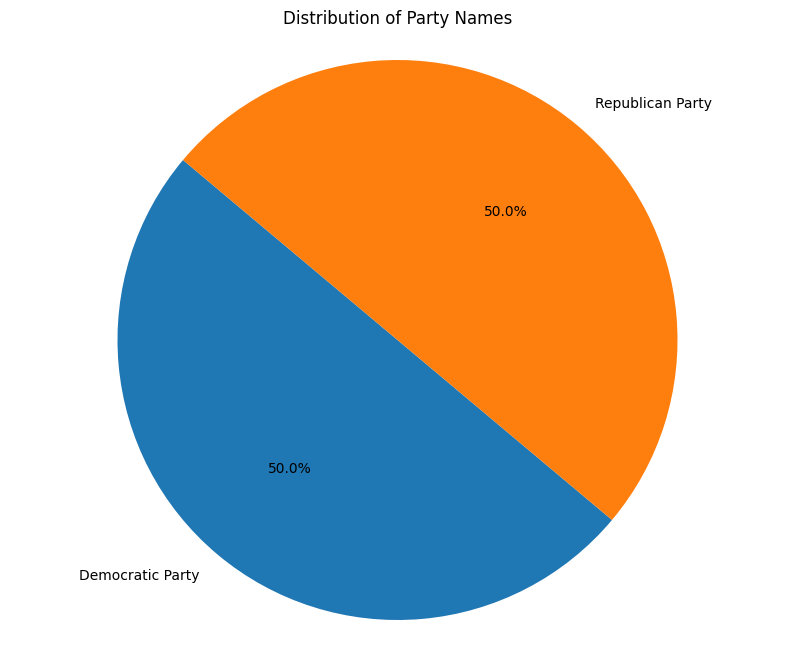

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Path to the JSON file
json_file_path = '/content/us_filtered.json'

# Load the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out entries with no text
df = df[df['text'].notna()]

# Calculate token lengths for each text entry
df['Token Length'] = df.apply(lambda row: len(tokenizer.encode(row['text'], add_special_tokens=True)), axis=1)

# Display the DataFrame with Token Lengths
print(df[['manifesto_id', 'Token Length']])

# Statistical measures
print("\nStatistical Measures:")
print(f"Mean Token Length: {df['Token Length'].mean()}")
print(f"Median Token Length: {df['Token Length'].median()}")
print(f"Maximum Token Length: {df['Token Length'].max()}")
print(f"Minimum Token Length: {df['Token Length'].min()}")

# Plotting Token Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Token Length'], bins=30, kde=True)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Token Lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Token Length'])
plt.title('Boxplot of Token Lengths')
plt.xlabel('Token Length')
plt.show()

# Count the occurrences of each party name
party_counts = df['partyname'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Party Names')
plt.show()

100%|██████████| 32/32 [1:10:06<00:00, 131.46s/it]

Accuracy: 0.2188
              precision    recall  f1-score   support

      center       0.00      0.00      0.00         0
        left       1.00      0.31      0.48        16
       right       0.67      0.12      0.21        16

    accuracy                           0.22        32
   macro avg       0.56      0.15      0.23        32
weighted avg       0.83      0.22      0.34        32




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x700 with 0 Axes>

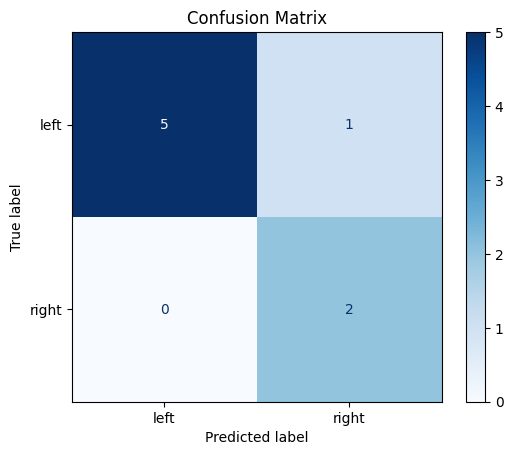

In [ ]:
import numpy as np
import pandas as pd
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from tqdm import tqdm

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")
stance_mapping = {0: 'left', 1: 'center', 2: 'right'}

# Function to chunk text by sentences
def chunk_text_by_sentences(text, max_tokens):
    sentences = sent_tokenize(text)
    token_chunks = []
    current_chunk = []

    for sentence in sentences:
        sentence_tokens = tokenizer.encode(sentence, add_special_tokens=False)
        if len(current_chunk) + len(sentence_tokens) > max_tokens:
            token_chunks.append(current_chunk)
            current_chunk = sentence_tokens
        else:
            current_chunk.extend(sentence_tokens)

    if current_chunk:
        token_chunks.append(current_chunk)

    return token_chunks

def get_model_prediction(text_chunks):
    probs_list = []

    for chunk in text_chunks:
        # Convert token ids to text
        chunk_text = tokenizer.decode(chunk)

        # Tokenize the text
        inputs = tokenizer(chunk_text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)

        # Pass the inputs to the model
        outputs = model(**inputs)
        logits = outputs.logits
        probs = logits.softmax(dim=-1).squeeze().tolist()
        probs_list.append(probs)

    # Calculate the median probabilities
    probs_array = np.array(probs_list)
    median_probs = np.median(probs_array, axis=0)
    predicted_stance = stance_mapping[np.argmax(median_probs)]

    return predicted_stance

# Load the JSON file and preprocess data
json_file_path = '/content/us_filtered.json'
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out entries with no text or party name
df = df[df['text'].notna() & df['partyname'].notna()]

# Map 'partyname' to 'right' or 'left'
party_mapping = {'Republican Party': 'right', 'Democratic Party': 'left'}
df['mapped_party'] = df['partyname'].map(party_mapping)

# Filter out rows where 'mapped_party' is NaN (i.e., parties other than Republican or Democratic)
df = df.dropna(subset=['mapped_party'])

true_labels = []
predicted_labels = []

# Loop through the DataFrame
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # Convert text column to string
    text = str(row['text'])

    true_labels.append(row['mapped_party'])

    # Chunk text
    text_chunks = chunk_text_by_sentences(text, max_tokens=512)
    predicted_labels.append(get_model_prediction(text_chunks))

# Evaluate and plot
evaluation_df = pd.DataFrame({'True_Labels': true_labels, 'Predicted_Labels': predicted_labels})
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(true_labels, predicted_labels))

ordered_labels = ['left', 'right']
matrix = confusion_matrix(evaluation_df['True_Labels'], evaluation_df['Predicted_Labels'], labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=ordered_labels)
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


100%|██████████| 32/32 [1:05:25<00:00, 122.68s/it]


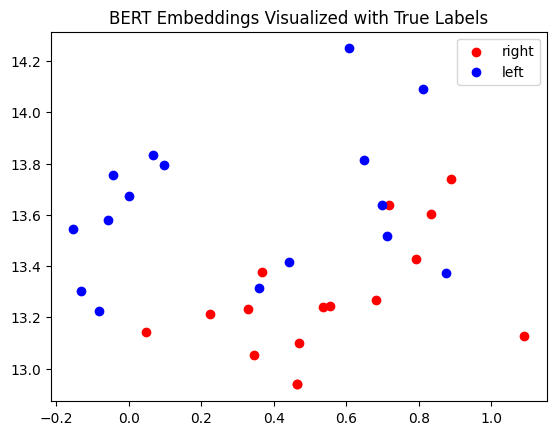

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")

# Function to get BERT embeddings
def get_bert_embeddings(text_chunks):
    all_embeddings = []

    for chunk in text_chunks:
        # Convert token ids to text
        chunk_text = tokenizer.decode(chunk)

        tokenized_inputs = tokenizer(chunk_text, truncation=True, return_tensors='pt', max_length=512)
        inputs = {'input_ids': tokenized_inputs['input_ids'], 'attention_mask': tokenized_inputs['attention_mask']}
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True)
        embeddings = outputs.hidden_states[-2][0].mean(dim=0)
        all_embeddings.append(embeddings.numpy())

    # Aggregate embeddings using median
    aggregated_embeddings = np.median(all_embeddings, axis=0)
    return aggregated_embeddings

# Load the JSON file and preprocess data
json_file_path = '/content/us_filtered.json'
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out entries with no text or party name
df = df[df['text'].notna() & df['partyname'].notna()]

# Map 'partyname' to 'right' or 'left'
party_mapping = {'Republican Party': 'right', 'Democratic Party': 'left'}
df['mapped_party'] = df['partyname'].map(party_mapping)

# Filter out rows where 'mapped_party' is NaN
df = df.dropna(subset=['mapped_party'])

embeddings = []
true_labels = []

# Loop through the DataFrame
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # Convert text column to string
    text = str(row['text'])

    text_chunks = chunk_text_by_sentences(text, max_tokens=512)

    emb = get_bert_embeddings(text_chunks)
    embeddings.append(emb)
    true_labels.append(row['mapped_party'])

# Convert to NumPy array and perform dimensionality reduction
embeddings_array = np.array(embeddings)
embeddings_reduced = TSNE(n_components=2, random_state=42).fit_transform(embeddings_array)

# Plotting
unique_labels = set(true_labels)
for label in unique_labels:
    indices = [i for i, x in enumerate(true_labels) if x == label]
    color = 'red' if label == 'right' else 'blue' if label == 'left' else 'green'
    plt.scatter(embeddings_reduced[indices, 0], embeddings_reduced[indices, 1], c=color, label=label)
plt.legend()
plt.title("BERT Embeddings Visualized with True Labels")
plt.show()
